### Import Packages

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Import Data

In [3]:
import pandas as pd
salary_data = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Salary%20Data.csv')
salary_data

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525
5,2.2,39891
6,2.5,48266
7,2.9,56642
8,3.0,60150
9,3.2,54445


In [4]:
salary_data.info()
salary_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Experience Years  40 non-null     float64
 1   Salary            40 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 772.0 bytes


,Experience Years,Salary
count,40.000000,40.000000
mean,5.152500,74743.625000
std,2.663715,25947.122885
min,1.100000,37731.000000
25%,3.200000,56878.250000
50%,4.600000,64472.500000
75%,6.875000,95023.250000
max,10.500000,122391.000000


In [5]:
X = salary_data["Experience Years"].values
y = salary_data["Salary"].values
X, y


(array([ 1.1,  1.2,  1.3,  1.5,  2. ,  2.2,  2.5,  2.9,  3. ,  3.2,  3.2,
         3.5,  3.7,  3.8,  3.9,  4. ,  4. ,  4.1,  4.3,  4.5,  4.7,  4.9,
         5.1,  5.3,  5.5,  5.9,  6. ,  6.2,  6.5,  6.8,  7.1,  7.9,  8.2,
         8.5,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5]),
 array([ 39343,  42774,  46205,  37731,  43525,  39891,  48266,  56642,
         60150,  54445,  64445,  60000,  57189,  60200,  63218,  55794,
         56957,  57081,  59095,  61111,  64500,  67938,  66029,  83088,
         82200,  81363,  93940,  91000,  90000,  91738,  98273, 101302,
        113812, 111620, 109431, 105582, 116969, 112635, 122391, 121872]))

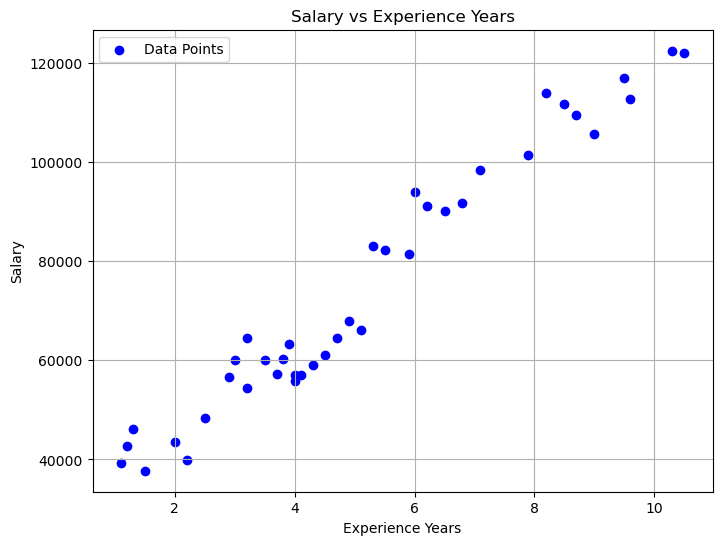

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(X, y, color='blue') 
plt.title('Salary vs Experience Years')
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.legend(['Data Points'])
plt.grid()
plt.show()


### 🧮 Split the data to train and test sets.
* in fact we must split the data to train, vlaidation and test sets. But for simplicity we will split the data to train and test sets only. Since we have no data enough to split it to three sets.
* train data is used to train the model.
* test data is used to evaluate the model.
* there is specific class in sklearn library to split the data to train and test sets. It is called train_test_split.
* there is specific attribute called model_selection in sklearn library. This attribute contains the class train_test_split.


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

X_train, y_train, X_test, y_test

print("X train: \n {}".format(X_train))
print("y train: \n {}".format(y_train))
print("X test: \n {}".format(X_test))
print("y test: \n {}".format(y_test))

print("the shapes of train and test sets: ")
print("shape of x train: {}".format(X_train.shape))
print("shape of y train: {}".format(y_train.shape))
print("shape of x test: {}".format(X_test.shape))   
print("shape of y test: {}".format(y_test.shape))

X train: 
 [ 3.8  7.9  8.7  3.   4.1  5.5  1.1  8.5  2.2  3.5  1.2  6.8  4.9  1.3
  7.1  9.5  1.5  9.   5.3  8.2  3.2  5.1  4.3  4.7  2.9  3.9  6.5 10.3]
y train: 
 [ 60200 101302 109431  60150  57081  82200  39343 111620  39891  60000
  42774  91738  67938  46205  98273 116969  37731 105582  83088 113812
  64445  66029  59095  64500  56642  63218  90000 122391]
X test: 
 [ 4.5  4.   4.   6.   2.   3.7  9.6  6.2 10.5  2.5  5.9  3.2]
y test: 
 [ 61111  56957  55794  93940  43525  57189 112635  91000 121872  48266
  81363  54445]
the shapes of train and test sets: 
shape of x train: (28,)
shape of y train: (28,)
shape of x test: (12,)
shape of y test: (12,)


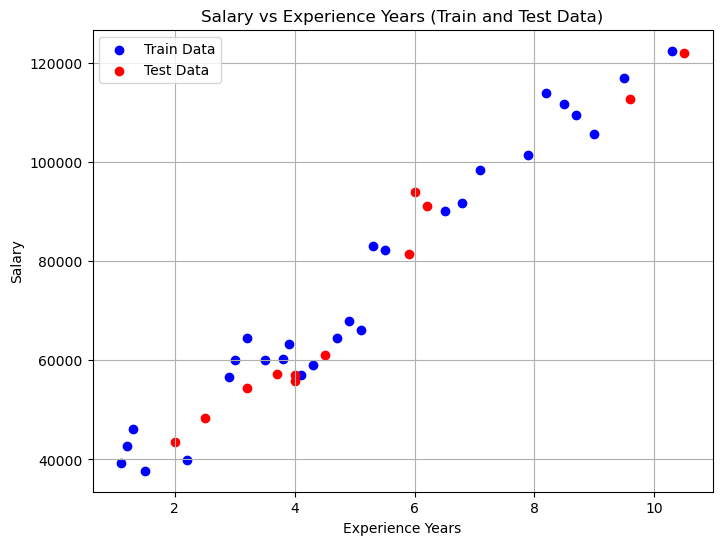

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.title('Salary vs Experience Years (Train and Test Data)')
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.legend()
plt.grid()
plt.show()

### ✅Normalize the data
* it is important to normalize the data before training the model. This is because the model will converge faster if the data is normalized.
* there is specific class in sklearn library to normalize the data. It is called StandardScaler.
* there is specific attribute called preprocessing in sklearn library. This attribute contains the class StandardScaler.
* Standard Scaler normalizes the data by subtracting the mean and dividing by the standard deviation. It transforms the data to have a mean of 0 and a standard deviation of 1. data = (data - mean) / std, data will be transfer to standard normal distribution.So, data will be put in the range of -1 to 1.

In [9]:
# convert to 2D array
X_train = X_train.reshape(-1, 1) # reshape to 2D array
y_train = y_train.reshape(-1, 1) # reshape to 2D array
X_test = X_test.reshape(-1, 1) # reshape to 2D array
y_test = y_test.reshape(-1, 1) # reshape to 2D array
X_train.shape, X_test.shape, y_train.shape, y_test.shape # check the shapes after reshaping

((28, 1), (12, 1), (28, 1), (12, 1))

In [10]:
# ✅Normalize the data
x_scaler = StandardScaler() # create an object of StandardScaler class
X_train = x_scaler.fit_transform(X_train) # fit and transform the data

y_scaler = StandardScaler() # create an object of StandardScaler class
y_train = y_scaler.fit_transform(y_train) # fit and transform the data  

X_test = x_scaler.transform(X_test) # transform the data
y_test = y_scaler.transform(y_test) # transform the data   

print("X train after normalization: \n {}".format(X_train))
print("y train after normalization: \n {}".format(y_train))
print("X test after normalization: \n {}".format(X_test))
print("y test after normalization: \n {}".format(y_test))


X train after normalization: 
 [[-0.50246549]
 [ 1.03165787]
 [ 1.33099901]
 [-0.80180663]
 [-0.39021256]
 [ 0.13363444]
 [-1.51274185]
 [ 1.25616373]
 [-1.10114778]
 [-0.61471842]
 [-1.47532421]
 [ 0.6200638 ]
 [-0.09087142]
 [-1.43790657]
 [ 0.73231673]
 [ 1.63034016]
 [-1.36307128]
 [ 1.44325194]
 [ 0.05879915]
 [ 1.1439108 ]
 [-0.72697135]
 [-0.01603613]
 [-0.31537728]
 [-0.1657067 ]
 [-0.83922428]
 [-0.46504785]
 [ 0.50781087]
 [ 1.9296813 ]]
y train after normalization: 
 [[-0.58951916]
 [ 1.00291096]
 [ 1.31785584]
 [-0.59145633]
 [-0.71035975]
 [ 0.26283504]
 [-1.3975897 ]
 [ 1.40266508]
 [-1.37635833]
 [-0.59726784]
 [-1.26466118]
 [ 0.63236934]
 [-0.28972294]
 [-1.13173267]
 [ 0.88555728]
 [ 1.60990338]
 [-1.46004401]
 [ 1.16873259]
 [ 0.29723916]
 [ 1.48759055]
 [-0.42505355]
 [-0.36368404]
 [-0.63233059]
 [-0.42292266]
 [-0.72736809]
 [-0.47259166]
 [ 0.56503335]
 [ 1.81996995]]
X test after normalization: 
 [[-0.24054199]
 [-0.42763021]
 [-0.42763021]
 [ 0.32072265]
 [-1.1

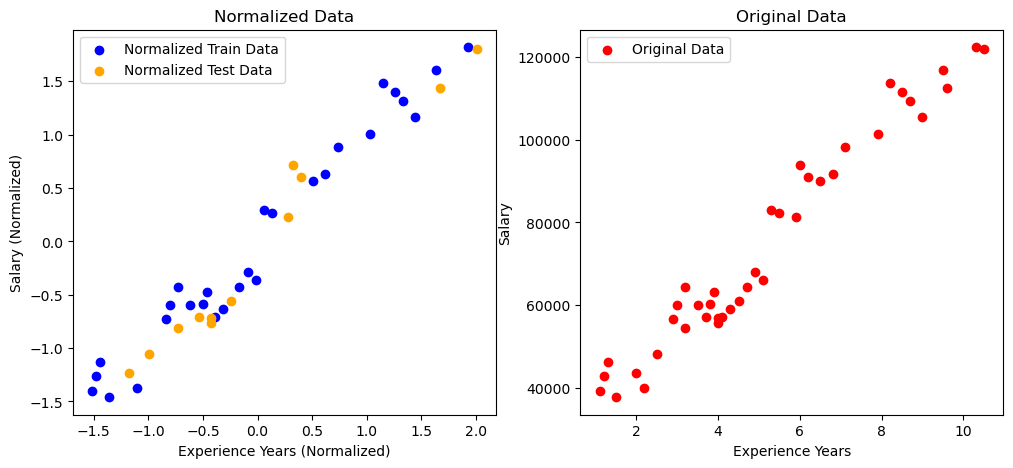

In [11]:
# plot the normalized data and original data in different figures
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Normalized Data')
plt.scatter(X_test, y_test, color='orange', label='Normalized Test Data')
plt.legend(['Normalized Train Data', 'Normalized Test Data'])
plt.title('Normalized Data')
plt.xlabel('Experience Years (Normalized)')
plt.ylabel('Salary (Normalized)')
plt.subplot(1, 2, 2)
plt.scatter(salary_data["Experience Years"], salary_data["Salary"], color='red', label='Original Data')
plt.title('Original Data')
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.legend()
plt.show()


### convert to torch tensors
* PyTorch models work with tensors. So, we need to convert the numpy arrays to torch tensors.
### Reshape the data
* we need to reshape the data to 2D arrays. This is because the model expects the input data to be in 2D format.
* we can use the reshape method of numpy arrays to reshape the data.
* of course we reshaped them in the previous step.
### float32
* as default numpy creates arrays with float64 type.
* we need to convert the data to float32 type. This is because PyTorch models work with float32 type.

In [28]:
# conv ert to torch tensors and float32
X_train_tensor = torch.tensor(X_train, dtype=torch.float32), 
y_train_tensor = torch.tensor(y_train, dtype=torch.float32), 
X_test_tensor = torch.tensor(X_test, dtype=torch.float32), 
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

print("X train tensor: \n {}".format(X_train_tensor))
print("y train tensor: \n {}".format(y_train_tensor))
print("X test tensor: \n {}".format(X_test_tensor))
print("y test tensor: \n {}".format(y_test_tensor)) 


# check the shapes of tensors
print("the shapes of train and test tensors: ")
print("shape of x train tensor: {}".format(X_train_tensor[0].shape))
print("shape of y train tensor: {}".format(y_train_tensor[0].shape))
print("shape of x test tensor: {}".format(X_test_tensor[0].shape))   
print("shape of y test tensor: {}".format(y_test_tensor[0].shape))



X train tensor: 
 (tensor([[-0.5025],
        [ 1.0317],
        [ 1.3310],
        [-0.8018],
        [-0.3902],
        [ 0.1336],
        [-1.5127],
        [ 1.2562],
        [-1.1011],
        [-0.6147],
        [-1.4753],
        [ 0.6201],
        [-0.0909],
        [-1.4379],
        [ 0.7323],
        [ 1.6303],
        [-1.3631],
        [ 1.4433],
        [ 0.0588],
        [ 1.1439],
        [-0.7270],
        [-0.0160],
        [-0.3154],
        [-0.1657],
        [-0.8392],
        [-0.4650],
        [ 0.5078],
        [ 1.9297]]),)
y train tensor: 
 (tensor([[-0.5895],
        [ 1.0029],
        [ 1.3179],
        [-0.5915],
        [-0.7104],
        [ 0.2628],
        [-1.3976],
        [ 1.4027],
        [-1.3764],
        [-0.5973],
        [-1.2647],
        [ 0.6324],
        [-0.2897],
        [-1.1317],
        [ 0.8856],
        [ 1.6099],
        [-1.4600],
        [ 1.1687],
        [ 0.2972],
        [ 1.4876],
        [-0.4251],
        [-0.3637],
        [